# Downscaled DTR

This notebook is for exploring downscaled daily temperature range data. We are specifically interested in DTR from GFDL-ESM4, because of the physically implausible tasmin values derived from tasmax - dtr, but other models exhibit some suspicious cold values as well.

In [1]:
import math
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from pathlib import Path
from xclim.core.units import convert_units_to
import matplotlib.pyplot as plt


zarr_dir = Path(
    os.getenv("ZARR_DIR", "/center1/CMIP6/kmredilla/cmip6_4km_downscaling/adjusted")
)
sim_dir = Path(
    os.getenv("CMIP6_DIR", "/center1/CMIP6/kmredilla/cmip6_4km_downscaling/cmip6_zarr")
)

In [13]:
model = "GFDL-ESM4"
scenario = "ssp585"


zarr_store = zarr_dir.joinpath(f"dtr_{model}_{scenario}_adjusted.zarr")
ds = xr.open_zarr(zarr_store)
dtr = ds["dtr"]
dtr.attrs["units"] = "°C"

In [18]:
ref_dir = Path("/center1/CMIP6/kmredilla/cmip6_4km_downscaling/era5_zarr")
era5_ds = xr.open_dataset(ref_dir.joinpath("dtr_era5.zarr"))

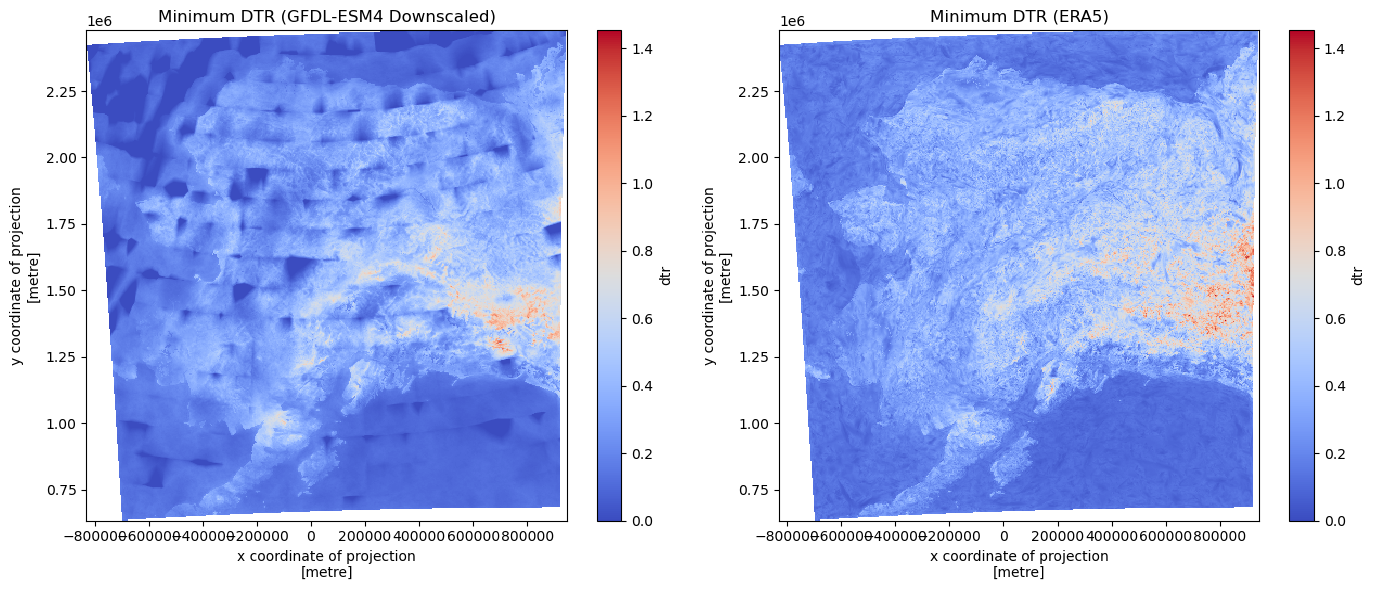

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Compute min values for both datasets
dtr_min = dtr.min("time")
era5_min = era5_ds["dtr"].min("time")

# Find global min and max for consistent color scale
vmin = min(float(dtr_min.min().values), float(era5_min.min().values))
vmax = max(float(dtr_min.max().values), float(era5_min.max().values))

# Plot minimum DTR from downscaled data
dtr_min.plot(ax=ax[0], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[0].set_title("Minimum DTR (GFDL-ESM4 Downscaled)")

# Plot minimum DTR from ERA5 reference data
era5_min.plot(ax=ax[1], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[1].set_title("Minimum DTR (ERA5)")

plt.tight_layout()
plt.show()

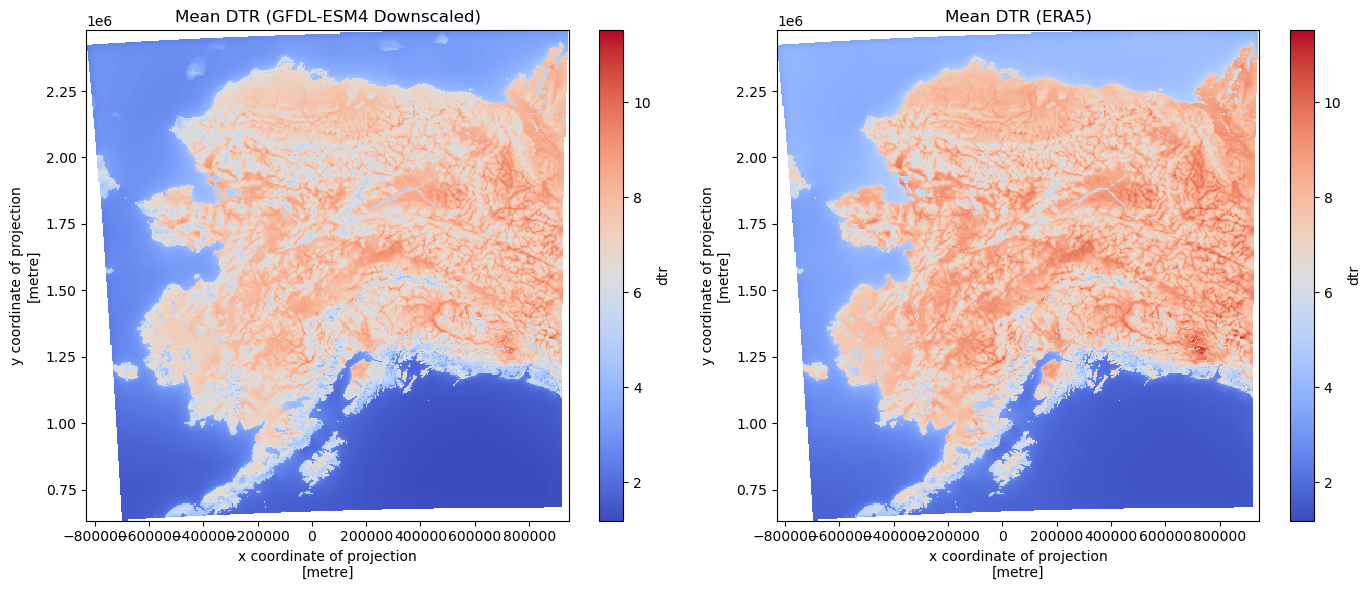

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Compute mean values for both datasets
dtr_mean = dtr.mean("time")
era5_mean = era5_ds["dtr"].mean("time")

# Find global min and max for consistent color scale
vmin = min(float(dtr_mean.min().values), float(era5_mean.min().values))
vmax = max(float(dtr_mean.max().values), float(era5_mean.max().values))

# Plot mean DTR from downscaled data
dtr_mean.plot(ax=ax[0], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[0].set_title("Mean DTR (GFDL-ESM4 Downscaled)")

# Plot mean DTR from ERA5 reference data
era5_mean.plot(ax=ax[1], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[1].set_title("Mean DTR (ERA5)")

plt.tight_layout()
plt.show()

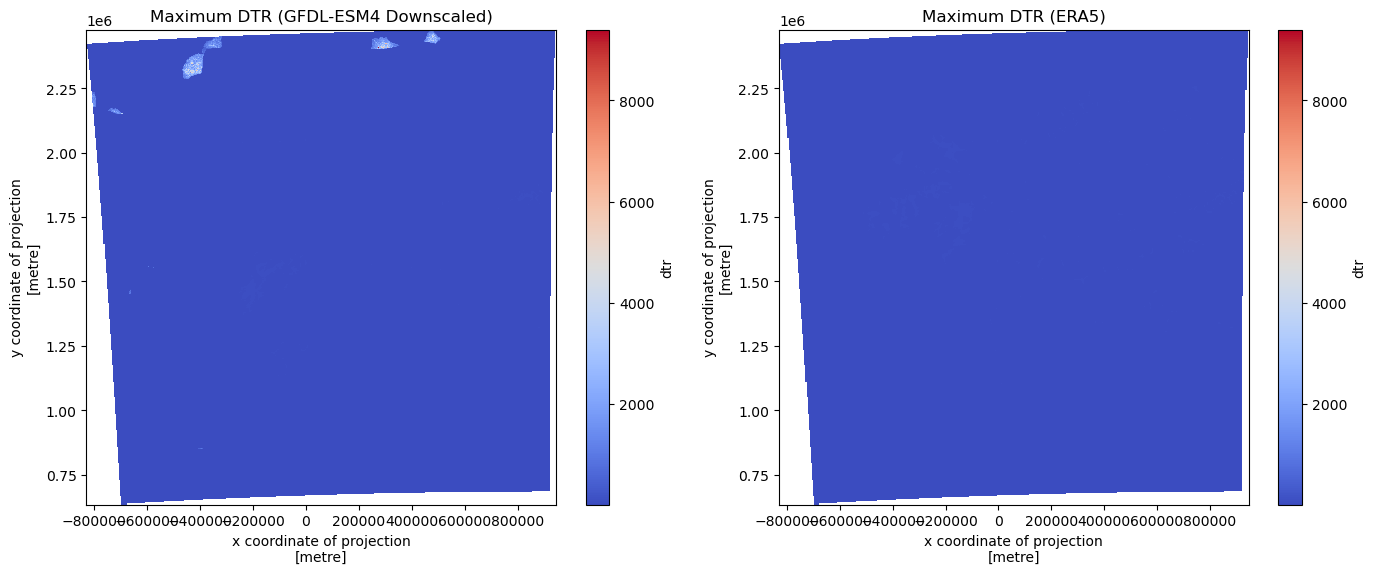

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Compute max values for both datasets
dtr_max = dtr.max("time")
era5_max = era5_ds["dtr"].max("time")

# Find global min and max for consistent color scale
vmin = min(float(dtr_max.min().values), float(era5_max.min().values))
vmax = max(float(dtr_max.max().values), float(era5_max.max().values))

# Plot maximum DTR from downscaled data
dtr_max.plot(ax=ax[0], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[0].set_title("Maximum DTR (GFDL-ESM4 Downscaled)")

# Plot maximum DTR from ERA5 reference data
era5_max.plot(ax=ax[1], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[1].set_title("Maximum DTR (ERA5)")

plt.tight_layout()
plt.show()

Maximum ERA5 DTR is 66. 

In [24]:
era5_ds["dtr"].max().values

array(66.09098816)

Visualize DTR where it is less than 70:

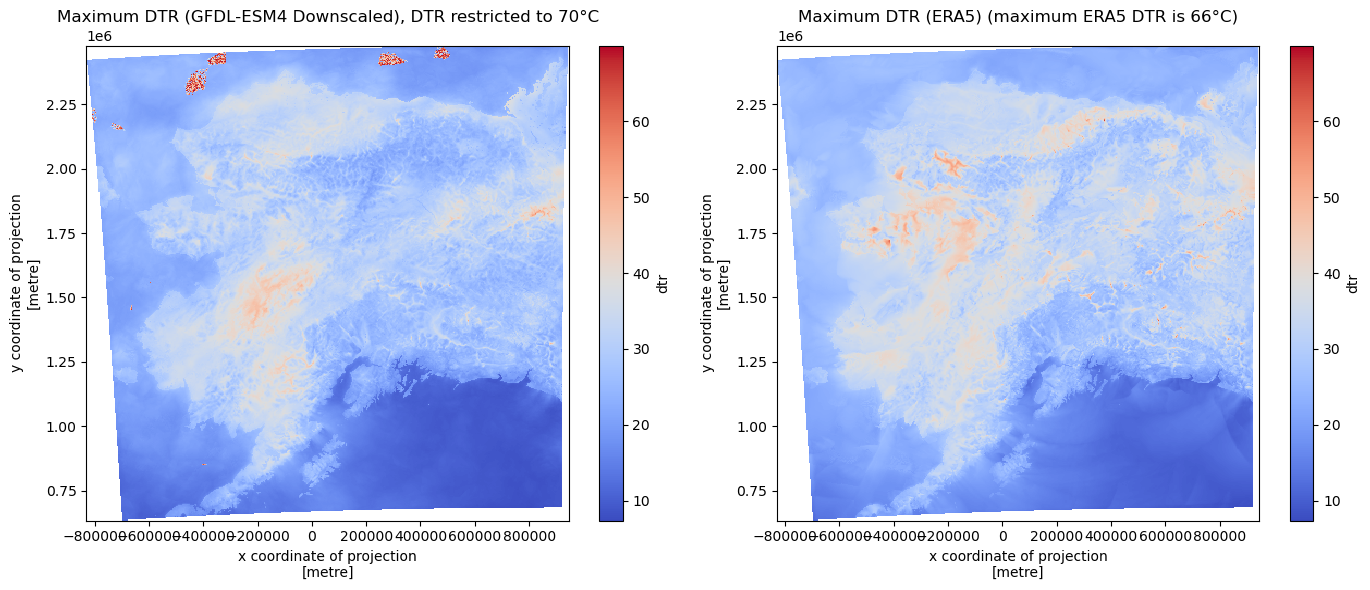

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Compute max values for both datasets
dtr_masked = dtr.where(dtr <= 70)
dtr_max = dtr_masked.max("time")
era5_max = era5_ds["dtr"].max("time")

# Find global min and max for consistent color scale
vmin = min(float(dtr_max.min().values), float(era5_max.min().values))
vmax = max(float(dtr_max.max().values), float(era5_max.max().values))

# Plot maximum DTR from downscaled data
dtr_max.plot(ax=ax[0], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[0].set_title("Maximum DTR (GFDL-ESM4 Downscaled), DTR restricted to 70°C")

# Plot maximum DTR from ERA5 reference data
era5_max.plot(ax=ax[1], cmap="coolwarm", vmin=vmin, vmax=vmax)
ax[1].set_title("Maximum DTR (ERA5) (maximum ERA5 DTR is 66°C)")

plt.tight_layout()
plt.show()